# Summary

Please refer to the [README.md](./README.md) for more information on the objectives and methods.

In this notebook, I show an example with 5000 documents scrapped from Pubmed API with ```search_term```= "neurogenesis", "gliogenesis", "neuronal_migration","synaptogenesis" and "myelination". The titles and the abstracts of each documents are annotated with BeCAS tool, and the resulting combined annotations and MeshHeadings key words are translated into vectors using a pretrained BioWordVec word embedding to represent each document.

#### Preprocessing:

The .csv files, scrapped and annotated using the [annotate_pubmed](./annotate_pubmed.py) and [pubmed_scrap](./pubmed_scrap.py), are imported and preprocessed to remove any duplicating documents, empty annotations. Each document is then transformed into a class ```Paper``` and put into a dictionary ```papers```,where the keys are the PMID.

We have 3006 papers, that are dated from 2010 or later.

#### Most common words:

We take the 5 most common words for each documents using the word embeddings, such that words that are semantically close to each other are counted as one; this is necessary to avoid counting "asd" and "autism-spectrum-disorders" as two different terminologies.

Then we visualise 100 most common words from all 3006 papers in the pie chart. *See breakdowns of terms below*

#### Papers clustering

As each paper is represented by the mean vector word embedding, we want to see if we can cluster those papers together using K-means clustering and if it is successful, what is the underlying commonality between them.

The clustering with 10 centroids show no real difference between the clusters, maybe more clusters would be better? *See figures*

# Preprocessing

In [3]:
import pandas as pd
import numpy as np
import preprocessing_data
from gensim.models import KeyedVectors #this is necessary to run the word embedding

In [59]:
gliogenesis=pd.read_csv('./dataset/pubmed/data_1000_gliogenesis_22092020.csv',header=None)
neuronal_migration=pd.read_csv('./dataset/pubmed/data_1000_neuronal_migration_22092020.csv',header=None)
neurogenesis=pd.read_csv('./dataset/pubmed/data_1000_neurogenesis_22092020.csv',header=None)
synaptogenesis=pd.read_csv('./dataset/pubmed/data_1000_synaptogenesis_22092020.csv',header=None)
myelination=pd.read_csv('./dataset/pubmed/data_1000_myelination_22092020.csv',header=None)

data=[gliogenesis,neurogenesis,synaptogenesis,neuronal_migration,myelination]
data=pd.concat(data).reset_index(drop=True)
data.columns=['Title','MeshHead','Abstract','Date','Type','PMID']


In [60]:
a_gliogenesis=pd.read_csv('./dataset/annotated/annotated_data_1000_gliogenesis_22092020.csv',header=None)
a_neuronal_migration=pd.read_csv('./dataset/annotated/annotated_data_1000_neuronal_migration_22092020.csv',header=None)
a_neurogenesis=pd.read_csv('./dataset/annotated/annotated_data_1000_neurogenesis_22092020.csv',header=None)
a_synaptogenesis=pd.read_csv('./dataset/annotated/annotated_data_1000_synaptogenesis_22092020.csv',header=None)
a_myelination=pd.read_csv('./dataset/annotated/annotated_data_1000_myelination_22092020.csv',header=None)

data_ann=[a_gliogenesis,a_neurogenesis,a_synaptogenesis,a_neuronal_migration,a_myelination]
data_ann=pd.concat(data_ann).reset_index(drop=True)
data_ann.columns=['Title','Becas','PMID']

In [147]:
new_data=preprocessing_data.merge_annotations(data,data_ann)

In [148]:
new_data.head(5)

,Title,Date,Combined_Annotation,PMID
0,Galectin-3 modulates postnatal subventricular ...,2019-10-18,"animals,astrocytes,cell-differentiation,cell-m...",31626379
1,Neural stem cells and neuro/gliogenesis in the...,2015-11-17,"animals,brain,central-nervous-system,humans,ne...",26578509
2,H2A.Z.1 crosstalk with H3K56-acetylation contr...,NaN,"acetylation,animals,astrocytes,cell-cycle-prot...",29982651
3,Adult Neurogenesis and Gliogenesis: Possible M...,2016-06-16,"gliogenesis,neurogenesis,homeostasis,progenito...",27358578
4,MEPO promotes neurogenesis and angiogenesis bu...,2019-02-02,"animals,brain-ischemia,cell-proliferation,eryt...",30716313


In [149]:
new_data=new_data.drop_duplicates(subset='PMID')

In [151]:
new_data=new_data[new_data['Combined_Annotation'].astype(bool)] #removes any empty combined_annotations

In [64]:
model=KeyedVectors.load_word2vec_format('bio_embedding_intrinsic',binary=True) #this is the word embedding pretrained model

In [74]:
sorted_mesh_head=sorted(list(set(str.split(','.join(data['MeshHead']),','))))
sorted_mesh_head=list(map(preprocessing_data.lower_case_and_hyphenated,sorted_mesh_head)) #this is needed in case the word in becas annotation is not recognized by the word embedding

Here, papers are organised into a dictionary, where the keys are the PMID and the values are the mean vector.

In [153]:
papers={}
for idx,pmid in enumerate(new_data['PMID']):
    papers[str(pmid)]=preprocessing_data.Paper(new_data['Title'].iloc[idx],
                                               new_data['Date'].iloc[idx],
                                              new_data['Combined_Annotation'].iloc[idx],
                                              pmid,sorted_mesh_head,model)

#this creates a dictionary of all papers and their vector representation. The words that is not in the dict are not included

nkx2.2 is not in the dict
nkx2.2 is not in the dict
nkx2.2 is not in the dict
/ is not in the dict
) is not in the dict
mek1/2 is not in the dict
hairy/e is not in the dict
hairy/e is not in the dict
hairy/e is not in the dict
name+ka is not in the dict
nkx2.2 is not in the dict
nkx2.2 is not in the dict
nkx2.2 is not in the dict
nkx2.2 is not in the dict
nkx2.9 is not in the dict
nkx2.2 is not in the dict
nkx2.2 is not in the dict
nkx2.2 is not in the dict
pax6</i is not in the dict
nkx2.2+ is not in the dict
nkx2.2+ is not in the dict
ng2+/beta is not in the dict
100beta is not in the dict
nkx2.2 is not in the dict
gsx1/2 is not in the dict
gsx1/2 is not in the dict
gsx1/2 is not in the dict
d*hyp is not in the dict
d*hyp is not in the dict
d*hyp is not in the dict
brdu+/s100+ is not in the dict
 is not in the dict
nkx2.1 is not in the dict
nkx6.1 is not in the dict
nkx2.2 is not in the dict
nfia/b is not in the dict
nfia/b is not in the dict
nestin+sox2+gfap+ is not in the dict
 is 

rs9462341 is not in the dict
1on is not in the dict
gad65/67 is not in the dict
ep24.15 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
tafa2 is not in the dict
hfbsc is not in the dict
 is not in the dict
 is not in the dict
5/hox is not in the dict
/ is not in the dict
 is not in the dict
) is not in the dict
) is not in the dict
) is not in the dict
h2bvenus is not in the dict
kca3.1 is not in the dict
kca3.1 is not in the dict
kca3.1 is not in the dict
kca3.1 is not in the dict
kca3.1 is not in the dict
mek1/2 is not in the dict
pi3k/akt/mtor is not in the dict
t724d is not in the dict
t724a is not in the dict
oh+cdnf is not in the dict
mek1/2 is not in the dict
dlx5/6 is not in the dict
dlx5/6 is not in the dict
nkx2.1 is not in the dict
 is not in the dict
 is not in the dict
y31/118 is 

# Most common terminology

In [156]:
common_key_words=[preprocessing_data.most_common_key(model,paper.new_key_words,5) for pmid,paper in papers.items() if preprocessing_data.checkdate(paper.date,2010)] #returns only those that are from 2010 and later

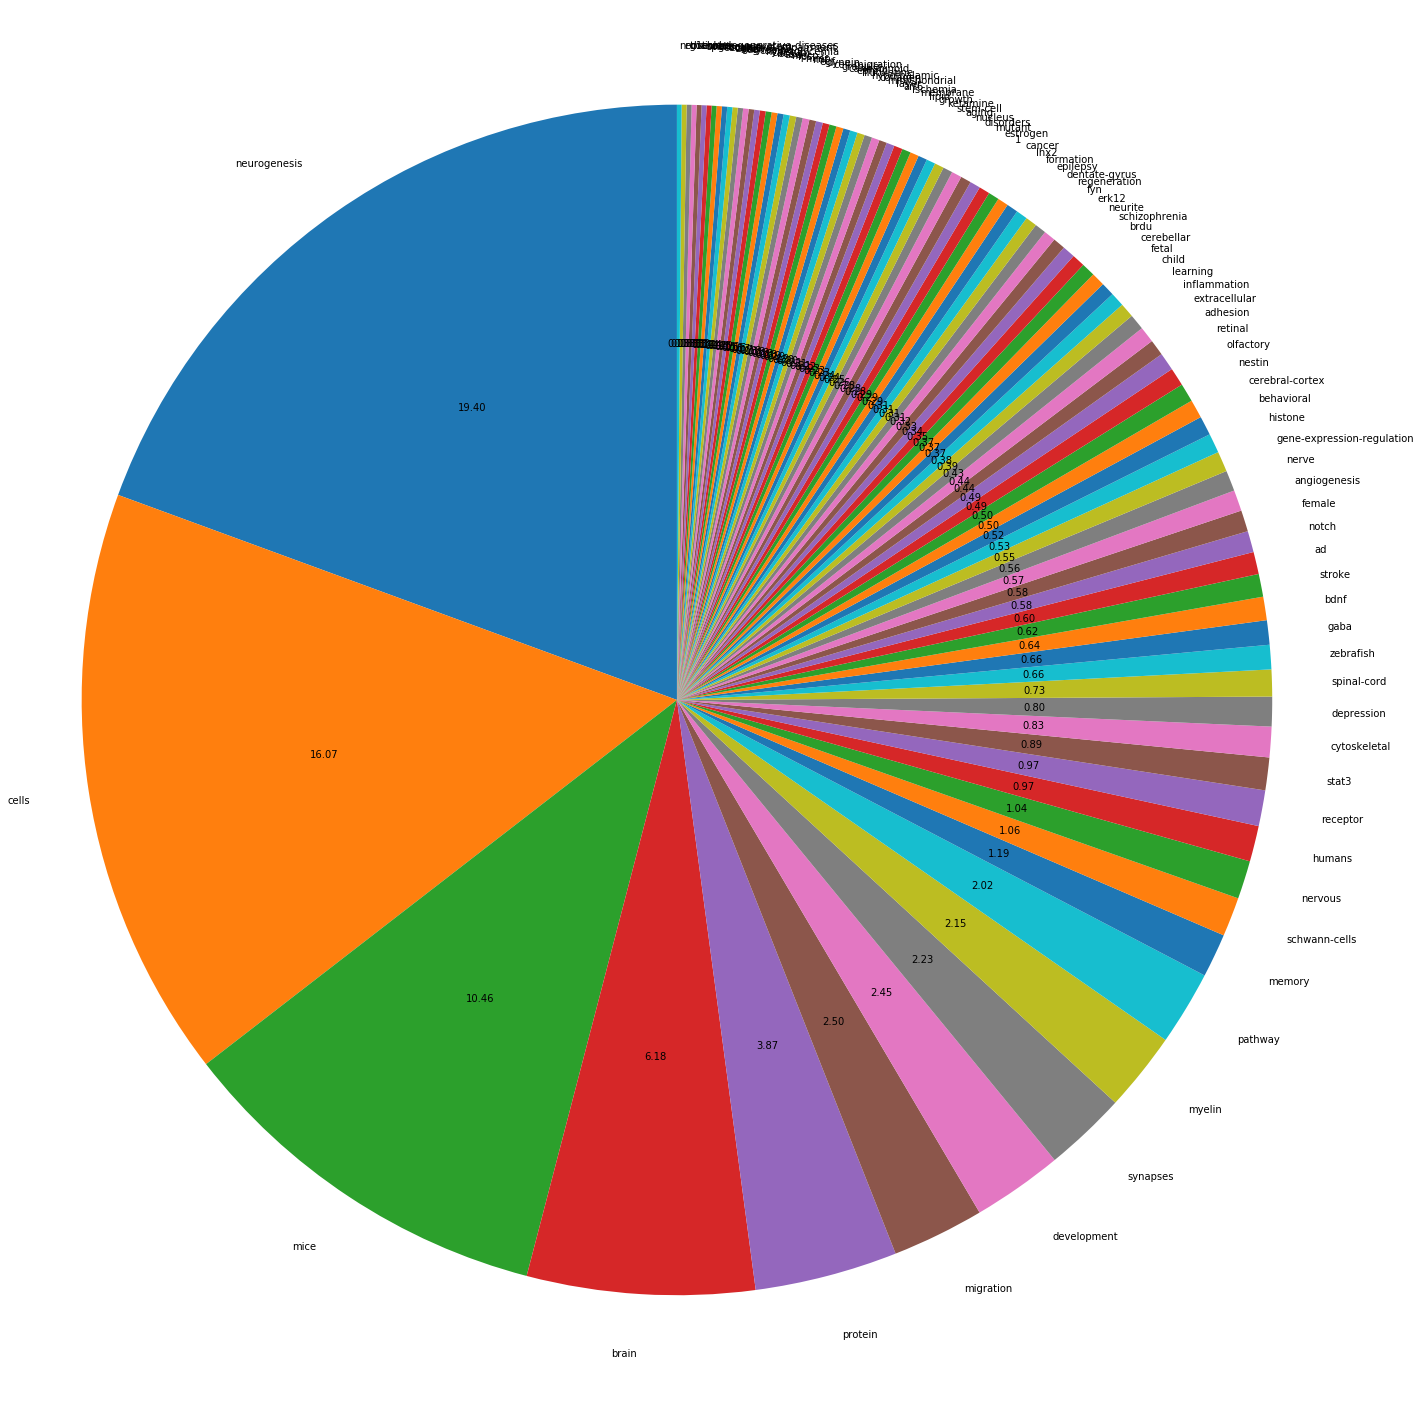

In [175]:
plt.figure(figsize=(20,20))
label_terms=np.asarray(common_key_words)
(label_highest_terms,label_term_share)=preprocessing_data.most_common_key(model,','.join(label_terms),number=100,return_counts=True)
label_highest_terms=str.split(label_highest_terms,',')
plt.pie(x=label_term_share,labels=label_highest_terms,autopct='%1.2f',startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [176]:
#Here is the breakdown
[(i,(str(np.round(label_term_share[x]*100/sum(label_term_share),2))+'%')) for x,i in enumerate(label_highest_terms)]

[('neurogenesis', '19.4%'),
 ('cells', '16.07%'),
 ('mice', '10.46%'),
 ('brain', '6.18%'),
 ('protein', '3.87%'),
 ('migration', '2.5%'),
 ('development', '2.45%'),
 ('synapses', '2.23%'),
 ('myelin', '2.15%'),
 ('pathway', '2.02%'),
 ('memory', '1.19%'),
 ('schwann-cells', '1.06%'),
 ('nervous', '1.04%'),
 ('humans', '0.97%'),
 ('receptor', '0.97%'),
 ('stat3', '0.89%'),
 ('cytoskeletal', '0.83%'),
 ('depression', '0.8%'),
 ('spinal-cord', '0.73%'),
 ('zebrafish', '0.66%'),
 ('gaba', '0.66%'),
 ('bdnf', '0.64%'),
 ('stroke', '0.62%'),
 ('ad', '0.6%'),
 ('notch', '0.58%'),
 ('female', '0.58%'),
 ('angiogenesis', '0.57%'),
 ('nerve', '0.56%'),
 ('gene-expression-regulation', '0.55%'),
 ('histone', '0.53%'),
 ('behavioral', '0.52%'),
 ('cerebral-cortex', '0.5%'),
 ('nestin', '0.5%'),
 ('olfactory', '0.49%'),
 ('retinal', '0.49%'),
 ('adhesion', '0.44%'),
 ('extracellular', '0.44%'),
 ('inflammation', '0.43%'),
 ('learning', '0.39%'),
 ('child', '0.38%'),
 ('fetal', '0.37%'),
 ('cerebell

# Papers clustering

In [154]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE




embedding_vector=[paper.word_embeddings for pmid,paper in papers.items() if preprocessing_data.checkdate(paper.date,2010)] #returns only those that are from 2010 and later


tsne=TSNE(n_components=2,metric='cosine',init='pca',random_state=42)
mapped_embeddings=tsne.fit_transform(embedding_vector)

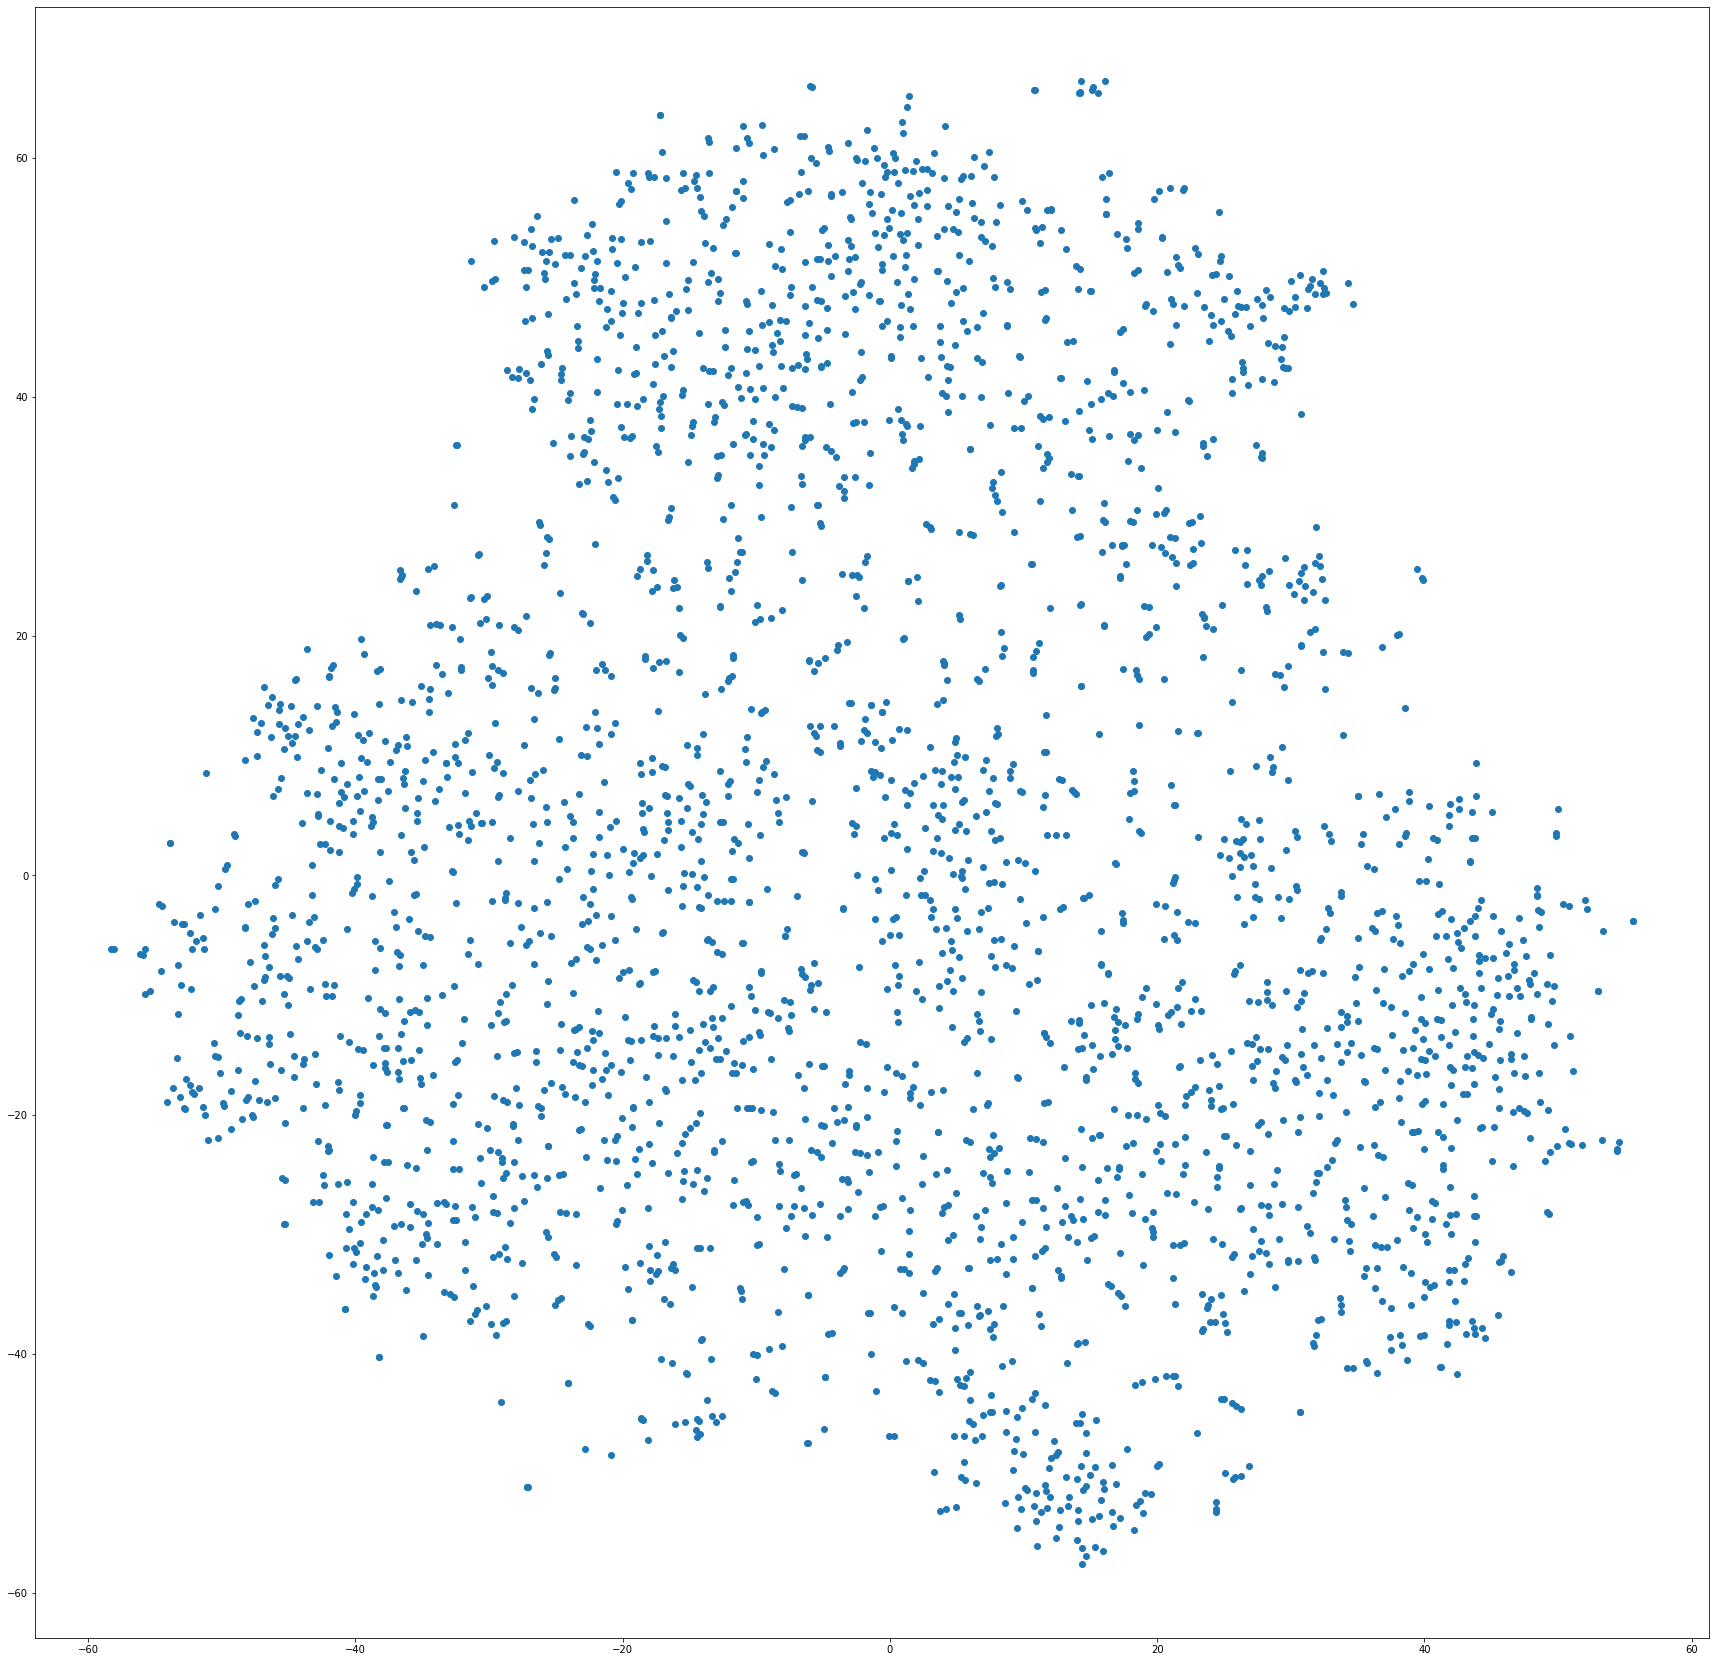

In [155]:
plt.figure(figsize=(30,30))
x=mapped_embeddings[:,0]
y=mapped_embeddings[:,1]
plt.scatter(x,y)

as we can see there are clearly distinct clusters of papers. Let's see if we can somehow examine them with k-mean clustering.

## K means clustering 

to identify clusters of topics?

In [166]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler=StandardScaler()
scaled_features=scaler.fit_transform(mapped_embeddings)

In [167]:
kmeans_kwargs={'init':'k-means++',
              'n_init':10,
              'max_iter':300,
              'random_state':42}
sse=[]
silhouette_coef=[]
for k in range(2,50):
    kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette_coef.append(silhouette_score(scaled_features,kmeans.labels_))

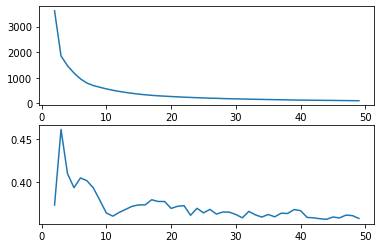

In [168]:
fig,ax=plt.subplots(2)
ax[0].plot(np.arange(2,50),sse[:48])
ax[1].plot(np.arange(2,50),silhouette_coef[:48])

lets look at k=10

In [169]:
kmeans=KMeans(n_clusters=10,**kmeans_kwargs)
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [170]:
def plot_kmeans(mapped_embeddings,n_clusters,kmeans_labels):
    plt.figure(figsize=(10,10))
    x=mapped_embeddings[:,0]
    y=mapped_embeddings[:,1]
    for i in range(n_clusters):
        plt.plot(x[np.where(kmeans.labels_==i)[0]],y[np.where(kmeans.labels_==i)[0]],'.')

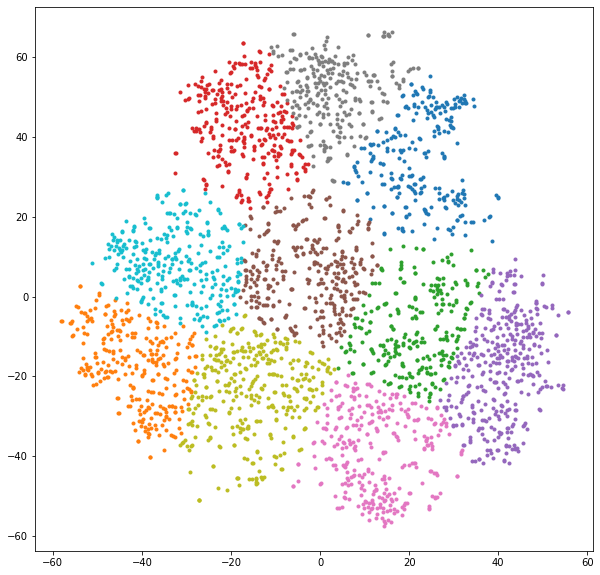

In [171]:
plot_kmeans(mapped_embeddings,10,kmeans.labels_)

In [172]:
def pie_chart(label_highest_terms,label_term_share,ax):
    label_highest_terms=str.split(label_highest_terms,',')
    ax.pie(x=label_term_share,labels=label_highest_terms,autopct='%1.2f',startangle=90)
    ax.axis('equal')

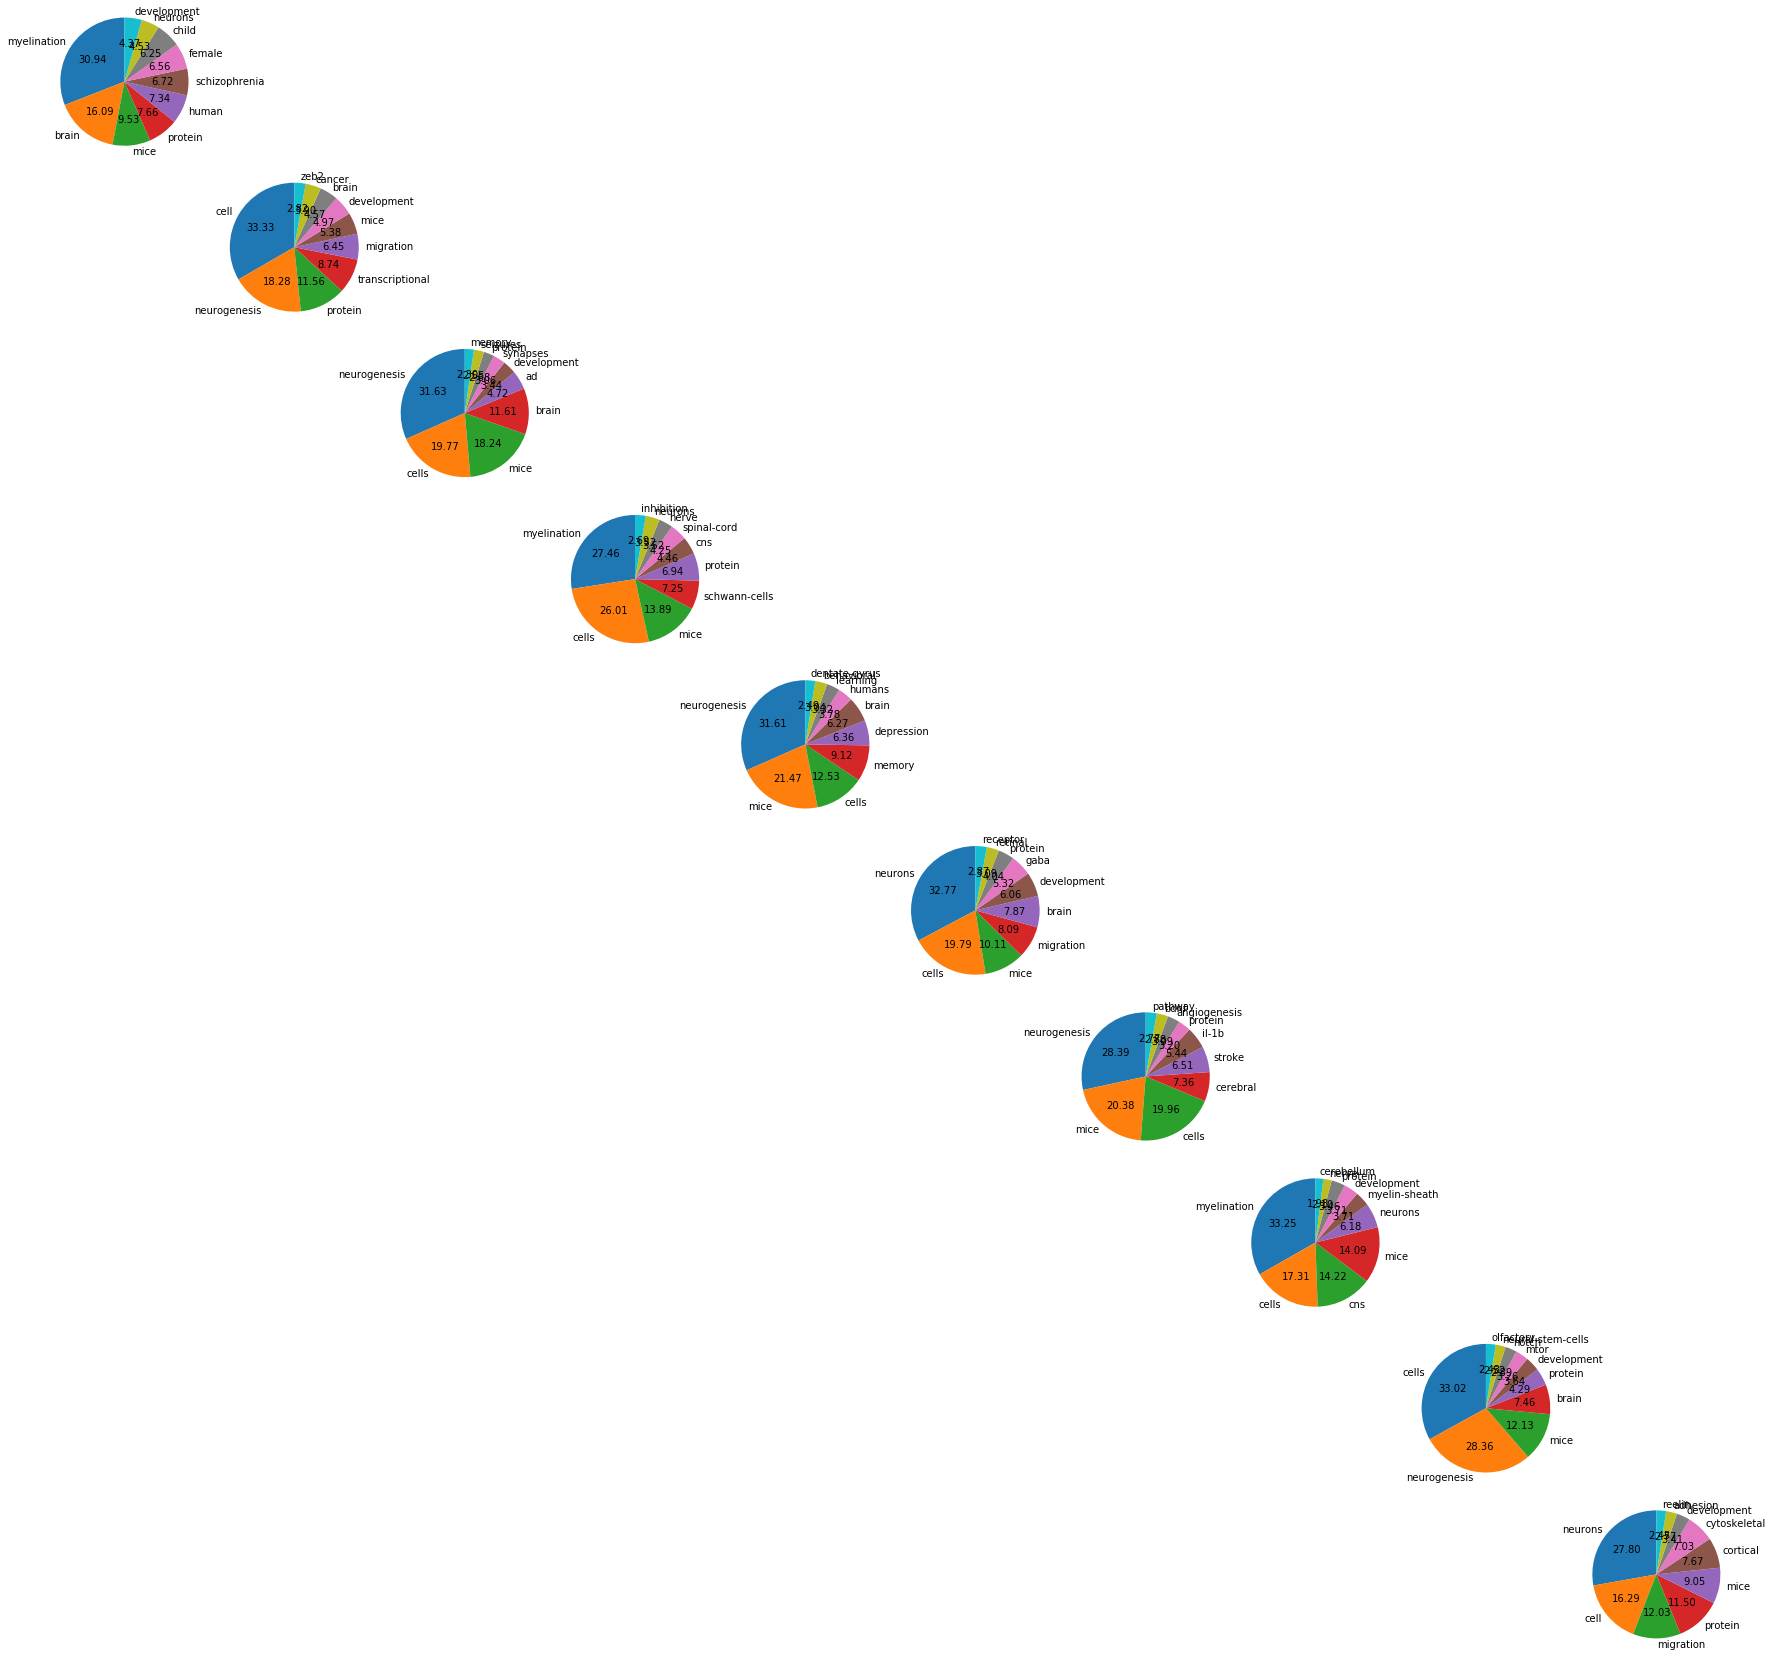

In [173]:
fig, axes = plt.subplots(10,10,figsize=(30,30))

for i,ax in enumerate(axes):
    label_terms=np.asarray(common_key_words)[np.where(kmeans.labels_==i)[0]]
    (label_highest_terms,label_term_share)=preprocessing_data.most_common_key(model,','.join(label_terms),number=10,return_counts=True)
    pie_chart(label_highest_terms,label_term_share,axes[i,i])

for row in range(10):
    for col in range(10):
        axes[row,col].axis('off')